<a href="https://colab.research.google.com/github/mango766/ml_learning/blob/main/08keras_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

初始化

In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


# 人工神经网络初探--使用keras实现MLP（多层感知机）

导入并检测TensorFlow2

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
tf.__version__

'2.11.0'

## 使用顺序API构建图像分类器

### 加载数据集

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

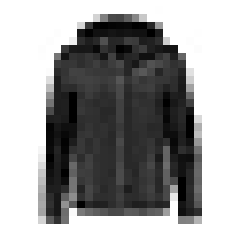

In [ ]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Saving figure fashion_mnist_plot


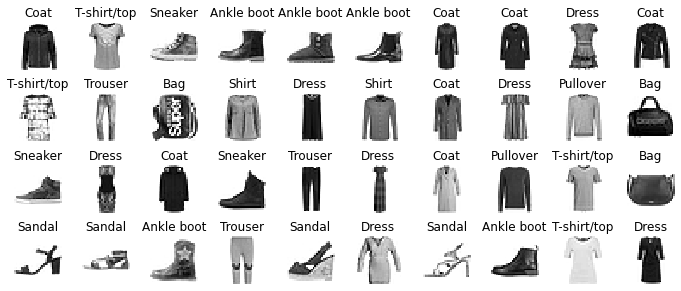

In [ ]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()

构建神经网络

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


显示层数

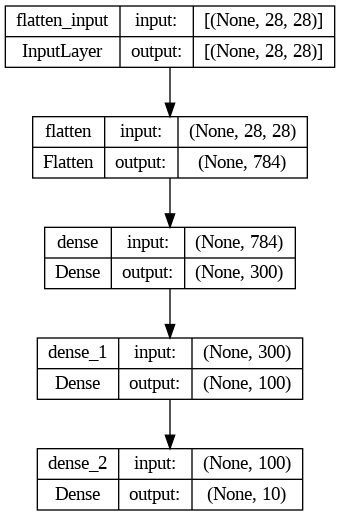

In [ ]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [ ]:
hidden1 = model.layers[1]
hidden1.name

'dense'

### 编译模型

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

模型.编译（损失=“sparse_categorical_crossentropy”，优化器=“sgd”，指标=[“准确性”]）

### 训练和评估模型

epochs,轮转次数，默认为1，这通常不足以收敛为一个好的模型

In [ ]:
history = model.fit(X_train,y_train,epochs=30,validation_data=(X_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 13s 7ms/step - loss: 0.7056 - accuracy: 0.7679 - val_loss: 0.5096 - val_accuracy: 0.8340
Epoch 2/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.4843 - accuracy: 0.8321 - val_loss: 0.4375 - val_accuracy: 0.8458
Epoch 3/30
1719/1719 [==============================] - 15s 9ms/step - loss: 0.4401 - accuracy: 0.8469 - val_loss: 0.4157 - val_accuracy: 0.8582
Epoch 4/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.4125 - accuracy: 0.8560 - val_loss: 0.4119 - val_accuracy: 0.8528
Epoch 5/30
1719/1719 [==============================] - 14s 8ms/step - loss: 0.3930 - accuracy: 0.8622 - val_loss: 0.3933 - val_accuracy: 0.8662
Epoch 6/30
1719/1719 [==============================] - 15s 9ms/step - loss: 0.3777 - accuracy: 0.8669 - val_loss: 0.3707 - val_accuracy: 0.8734
Epoch 7/30
1719/1719 [==============================] - 14s 8ms/step - loss: 0.3641 - accuracy: 0.8707 - val_loss: 0.3846 - val_ac

训练模型的参数

In [ ]:
print(history.params)
print(history.epoch)
print(history.history.keys())

{'verbose': 1, 'epochs': 30, 'steps': 1719}
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [ ]:
history.history

In [ ]:
type(history)

keras.callbacks.History

将dict数据转换为pd，并显示

In [ ]:
import pandas as pd
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.705630,0.767873,0.509577,0.8340
1,0.484270,0.832091,0.437495,0.8458
2,0.440150,0.846909,0.415671,0.8582
3,0.412494,0.855982,0.411931,0.8528
4,0.392978,0.862218,0.393339,0.8662
5,0.377718,0.866945,0.370719,0.8734
6,0.364077,0.870709,0.384612,0.8640
7,0.353047,0.875800,0.359026,0.8732
8,0.342164,0.878509,0.357210,0.8770
9,0.333191,0.881036,0.346449,0.8798


将pd类型数据画出来

<AxesSubplot:>

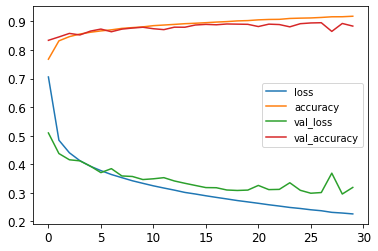

In [ ]:
pd.DataFrame(history.history).plot()

设置其他参数

具体来说，它首先将Keras模型的训练历史记录（即history.history）转换为一个Pandas DataFrame，并使用plot()方法绘制学习曲线。然后，它使用grid(True)方法添加网格线，使用gca().set_ylim(0,1)方法设置y轴的范围为0到1，以确保曲线可以完全显示。最后，它使用save_fig()方法将图像保存到本地磁盘，然后使用show()方法显示图像。

Saving figure keras_learning_curves_plot


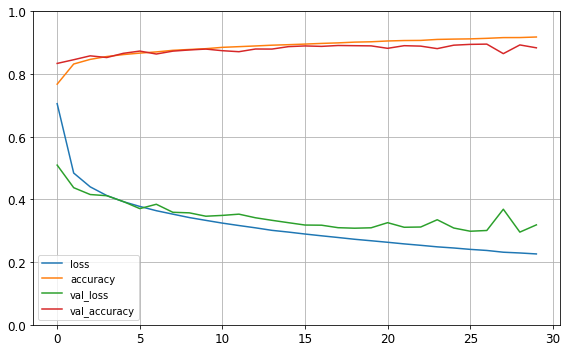

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
save_fig("keras_learning_curves_plot")
plt.show()

由于验证误差是在每个轮次结束时计算的，而训练误差是在每个轮次运行平均值计算的，因此应当将训练时的曲线向左移动半个轮次

In [ ]:
df1 = pd.DataFrame(history.history)

访问第一列数据
first_column = df.iloc[:, 0]

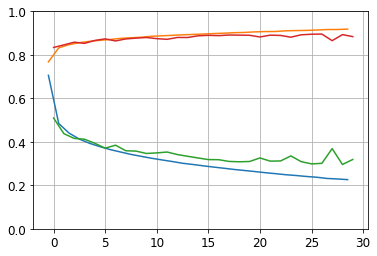

In [ ]:
plt.plot(figsize=(8,5))
plt.plot(np.arange(30)-0.5,df1.iloc[:, 0])
plt.plot(np.arange(30)-0.5,df1.iloc[:, 1])
plt.plot(np.arange(30),df1.iloc[:, 2])
plt.plot(np.arange(30),df1.iloc[:, 3])

plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

### 测试集评估

In [ ]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3493 - accuracy: 0.8761


[0.34925565123558044, 0.8761000037193298]

### 使用模型进行预测


In [ ]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 51ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.98],
       [0.  , 0.  , 0.99, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

y_proba.round(2)是一个对y_proba进行四舍五入保留两位小数的操作。

输出的是九个类的概率

In [ ]:
# y_pred = model.predict_classes(X_new),已经被弃用
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

1/1 [==============================] - 0s 53ms/step


array([9, 2, 1])

In [ ]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

发现预测对了

In [ ]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

Saving figure fashion_mnist_images_plot


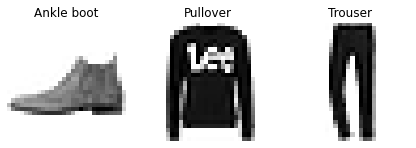

In [ ]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_images_plot', tight_layout=False)
plt.show()

## 使用顺序API构建回归MLP

使用回归神经网络解决加州住房问题

### 导入数据

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
housing = fetch_california_housing()

### 分割数据集

In [ ]:
X_train_full,X_test,y_train_full,y_test = train_test_split(housing.data,housing.target)

In [ ]:
X_train,X_valid,y_train,y_valid = train_test_split(X_train_full,y_train_full)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

np.random.seed(42)是numpy库中用于生成随机数的随机数生成器的种子。通过设置这个种子，可以确保每次生成的随机数序列都是相同的。

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss='mean_squared_error',optimizer='sgd')
history = model.fit(X_train,y_train,epochs = 20,validation_data=(X_valid,y_valid))

Epoch 1/20
363/363 [==============================] - 4s 7ms/step - loss: 1.0540 - val_loss: 0.9755
Epoch 2/20
363/363 [==============================] - 2s 7ms/step - loss: 0.6427 - val_loss: 0.5305
Epoch 3/20
363/363 [==============================] - 4s 10ms/step - loss: 0.4947 - val_loss: 0.4967
Epoch 4/20
363/363 [==============================] - 3s 8ms/step - loss: 0.4671 - val_loss: 0.4838
Epoch 5/20
363/363 [==============================] - 2s 5ms/step - loss: 0.4527 - val_loss: 0.4711
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4421 - val_loss: 0.4575
Epoch 7/20
363/363 [==============================] - 2s 6ms/step - loss: 0.4338 - val_loss: 0.4497
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4257 - val_loss: 0.4446
Epoch 9/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4185 - val_loss: 0.4381
Epoch 10/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4140 - val_loss: 0.434

In [ ]:
mse_test = model.evaluate(X_test,y_test)

162/162 [==============================] - 1s 7ms/step - loss: 0.3886


In [ ]:
X_new = X_test[:3]
y_pred = model.predict(X_new)
y_pred

1/1 [==============================] - 0s 104ms/step


array([[0.73452044],
       [1.7128121 ],
       [3.6503468 ]], dtype=float32)

In [ ]:
y_test[:3]

array([0.477  , 0.458  , 5.00001])

# 使用函数式API构建复杂模型

非顺序神经网络

宽神经网络，部分输入层数据直接连接到输出层

In [ ]:
input_ = keras.layers.Input(shape=X_train.shape[1:0])

hidden1 = 